<p><markdown translate="no" mathjax="" class="ng-tns-c364-40"><h1 id="processamento-digital-de-imagens-pdi"><strong>Processamento Digital de Imagens (PDI)</strong></h1>
<h2 id="transformada-de-fourier-e-morfologia"><strong>Transformada de Fourier e Morfologia</strong></h2>
<h3 id="índice">Índice</h3>
<ul>
<li>1) Filtragem no domínio da frequência</li>
<li>2) Morfologia Matemática</li>
</ul>
<h3 id="1-filtragem-no-domínio-da-frequência"><strong>1) Filtragem no domínio da frequência</strong></h3>
<p>Conforme discutimos anteriormente, o objetivo do pré-processamento é melhorar a imagem, evidenciando uma característica importante e atenuando uma prejudicial, como o ruído, aumentando a probabilidade de sucesso das etapas seguintes de PDI.</p>
<p>O pré-processamento pode ser dividido em dois tipos:</p>
<ol>
<li><em>Realce de imagens</em>: conjunto de técnicas para melhorar a imagem em um sentido predefinido (ex: detecção de bordas);</li>
<li><em>Restauração</em>: reconstruir ou recuperar uma imagem degradada por um fenômeno conhecido a priori (ex: eliminação de ruído).</li>
</ol>
<p>Todos os métodos possuem um alto grau de heurística, pois é necessário entender muito bem o fenômeno de degradação para conseguir chegar no resultado mais próximo do ideal.</p>
<h3 id="--transformada-de-fourier">- Transformada de Fourier</h3>
<p>Em alguns casos, é interessante aplicar os filtros à imagem no chamado <em>domínio da frequência</em>. Isso acontece porque o processamento no domínio da frequência é, muitas vzes, mais simples.</p>
<p>Uma imagem é transformada parao domínio da frequência após a aplicação da <em>transformada de Fourier</em> à imagem (no nosso caso, uma <em>transformada de Fourier discreta</em>, que abreviamos como <em>DFT</em>). Com isso, obtemos o <em>espectro</em> da imagem.</p>
<p>Após a transformação, aplica-se os filtros no domínio da frequência, e depoois aplica-se a <em>trasnformada de Fourier inversa</em>, para recuperarmos a imagem no domínio original (domínio do tempo).</p>
<p>Na imagem a seguir, temos em (a) a imagem original, com ruídos. Em (b), temos o espectro da imagem. Em (c), uma representação do filtro a ser aplicado ao espectro, e em (d), a imagem final, após o fim do processamento e aplicação da transformada inversa de Fourier:</p>
<p><img src="https://i.imgur.com/Dw4itbv.jpg" width="500"></p>
<p>Vamos agora a um exemplo prático usando a OpenCV!</p>
<p><strong>Importando as bibliotecas</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># importando a OpenCV</span>
<span class="token keyword">import</span> cv2
<span class="token comment"># importando o numpy, para manipulação matricial/vetorial</span>
<span class="token keyword">import</span> numpy <span class="token keyword">as</span> np
<span class="token comment"># importando a matplotlib para fazer plots de imagens</span>
<span class="token keyword">from</span> matplotlib <span class="token keyword">import</span> pyplot <span class="token keyword">as</span> plt</code></pre>
<p><strong>Lendo a imagem e aplicando a DFT</strong></p>
<p>Agora, leremos a imagem, e aplicaremos a DFT para obtermos o espectro da imagem (domínio da frequência).</p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># lendo a Lenna, em cores</span>
img <span class="token operator">=</span> cv2<span class="token punctuation">.</span>imread<span class="token punctuation">(</span><span class="token string">'lena_color.png'</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">)</span>

<span class="token comment"># aqui, fazemos a trasnformada de fourrier, pela função "dft", que quer dizer "trasnformada de fourier discreta"</span>
<span class="token comment"># como argumento, passamos a imagem com tipo de dados "float32", usando o numpy para isso</span>
<span class="token comment"># o argumento "flags=cv2.DFT_COMPLEX_OUTPUT" garante que a transformada de fourier será completa: uma matriz complexa</span>
dft <span class="token operator">=</span> cv2<span class="token punctuation">.</span>dft<span class="token punctuation">(</span>np<span class="token punctuation">.</span>float32<span class="token punctuation">(</span>img<span class="token punctuation">)</span><span class="token punctuation">,</span> flags<span class="token operator">=</span>cv2<span class="token punctuation">.</span>DFT_COMPLEX_OUTPUT<span class="token punctuation">)</span>
<span class="token comment"># aqui processamos o espectro da imagem, deslocando a componente de frequência zero do espectro</span>
<span class="token comment"># para o centro do espectro. Fazemos isso para facilitar a aplicação do filtro.</span>
<span class="token comment"># usamos a função do numpy "fft.fftshift"</span>
dft_shift <span class="token operator">=</span> np<span class="token punctuation">.</span>fft<span class="token punctuation">.</span>fftshift<span class="token punctuation">(</span>dft<span class="token punctuation">)</span>

<span class="token comment"># aqui, determinamos a magnitude do espectro (usando a função "magnitude" da OpenCV), </span>
<span class="token comment"># e tomamos o logaritmo do espectro (com a função "log" do numpy).</span>
<span class="token comment"># multiplicamos por 20 para melhor escalar o resultado</span>
magnitude_spectrum <span class="token operator">=</span> <span class="token number">20</span> <span class="token operator">*</span> np<span class="token punctuation">.</span>log<span class="token punctuation">(</span>cv2<span class="token punctuation">.</span>magnitude<span class="token punctuation">(</span>dft_shift<span class="token punctuation">[</span><span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">]</span><span class="token punctuation">,</span> dft_shift<span class="token punctuation">[</span><span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token number">1</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">)</span>

<span class="token comment"># criamos um subplot com a imagem original</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
<span class="token comment"># damos o título ao plot ("Imagem de entrada"), e ocultamos as labels dos eixos</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Imagem de entrada'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
<span class="token comment"># criamos um subplot com a magnitude do espectro</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>magnitude_spectrum<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
<span class="token comment"># damos o título ao plot ("Magnitude do espectro"), e ocultamos as labels dos eixos</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">"Magnitude do espectro"</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
<span class="token comment"># exibimos a imagem</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p>** Aplicando o filtro e a DFT inversa**</p>
<p>Com a imaem no domínio da frequência (espectro), podemos aplicar o filtro desejado, e depois aplicar a DFT inversa para obtermos a imagem no domínio original</p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># tomando a dimensão original da imagem</span>
rows<span class="token punctuation">,</span> cols <span class="token operator">=</span> img<span class="token punctuation">.</span>shape
<span class="token comment"># definindo a dimensão do filtro, que será metade das dimensões da imagem</span>
crow<span class="token punctuation">,</span> ccol <span class="token operator">=</span> <span class="token builtin">int</span><span class="token punctuation">(</span>rows <span class="token operator">/</span> <span class="token number">2</span><span class="token punctuation">)</span><span class="token punctuation">,</span> <span class="token builtin">int</span><span class="token punctuation">(</span>cols <span class="token operator">/</span> <span class="token number">2</span><span class="token punctuation">)</span>

<span class="token comment"># aqui criamos a máscara do filtro, como um quadrado contendo 1 no centro e zero nas outras entradas</span>
mask <span class="token operator">=</span> np<span class="token punctuation">.</span>zeros<span class="token punctuation">(</span><span class="token punctuation">(</span>rows<span class="token punctuation">,</span> cols<span class="token punctuation">,</span> <span class="token number">2</span><span class="token punctuation">)</span><span class="token punctuation">,</span> np<span class="token punctuation">.</span>uint8<span class="token punctuation">)</span>
mask<span class="token punctuation">[</span>crow <span class="token operator">-</span> <span class="token number">30</span><span class="token punctuation">:</span>crow <span class="token operator">+</span> <span class="token number">30</span><span class="token punctuation">,</span> ccol <span class="token operator">-</span> <span class="token number">30</span><span class="token punctuation">:</span>ccol <span class="token operator">+</span> <span class="token number">30</span><span class="token punctuation">]</span> <span class="token operator">=</span> <span class="token number">1</span>

<span class="token comment"># aplica á máscara do filtro</span>
fshift <span class="token operator">=</span> dft_shift <span class="token operator">*</span> mask

<span class="token operator">*</span> aqui<span class="token punctuation">,</span> fazemos o inverso do deslocamento do espectro que fizemos anteriormente
f_ishift <span class="token operator">=</span> np<span class="token punctuation">.</span>fft<span class="token punctuation">.</span>ifftshift<span class="token punctuation">(</span>fshift<span class="token punctuation">)</span>
<span class="token comment"># agora, aplicamos a transformada inversa, com a função "idft"</span>
img_back <span class="token operator">=</span> cv2<span class="token punctuation">.</span>idft<span class="token punctuation">(</span>f_ishift<span class="token punctuation">)</span>
<span class="token comment"># por fim, calculamos a magnitude do espectro da imagem trasnformada inversamente</span>
img_back <span class="token operator">=</span> cv2<span class="token punctuation">.</span>magnitude<span class="token punctuation">(</span>img_back<span class="token punctuation">[</span><span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">]</span><span class="token punctuation">,</span> img_back<span class="token punctuation">[</span><span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token punctuation">:</span><span class="token punctuation">,</span> <span class="token number">1</span><span class="token punctuation">]</span><span class="token punctuation">)</span>

<span class="token comment"># plotamos a imagem original, como antes</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Imagem de entrada'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
<span class="token comment"># plotamos a imagem final, após a aplciação do filtro e retorno ao domínio original</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img_back<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Imagem final'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<h3 id="2-morfologia-matemática"><strong>2) Morfologia Matemática</strong></h3>
<p>A Morfologia Matemática é um cojunto de ferramentas matemáticas para extração de componentes de imagens baseados na forma de objetos.</p>
<p>Esta técnica é útil para a representação e descrição de:</p>
<ul>
<li>Cantos;</li>
<li>Bordas;</li>
<li>Esqueletos;</li>
<li>Componente envolvente.</li>
</ul>
<p>A morfologia é um processo não linear, baseado na teoria de conjuntos e topologia.</p>
<p>A <em>erosão</em> e a <em>dilatação</em> são operadores considerados <em>elementares</em>, pois a maior parte dos operadores morfológicos utilizados podem ser implementados a partir deles.</p>
<p>Assim, os <em>Operadores Elementares</em> são:</p>
<ul>
<li>Dilatação;</li>
<li>Erosão;</li>
<li>Anti-dilatação;</li>
<li>Anti-erosão.</li>
</ul>
<p>Exemplos:</p>
<p>Considere a seguinte imagem de entrada:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/j.png"></p>
<ul>
<li><p><em>Erosão</em> - a imagem fica mais fina, através da erosão das bordas:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/erosion.png"></p>
</li>
<li><p><em>Dilatação</em> - a imagem fica mais grossa, através do aumento das bordas:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/dilation.png"></p>
</li>
<li><p><em>Abertura</em> - é o resultado da aplicação de erosão e depois dilatação. Ruídos externos à forma são eliminados:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/opening.png"></p>
</li>
<li><p><em>Fechamento</em> - é o resultado da aplicação de dilatação e depois erosão. Ruídos internos à forma são eliminados:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/closing.png"></p>
</li>
<li><p><em>Gradiente Morfológico</em> - é a diferença entre dilatação e erosão. Resulta no contorno da forma:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/gradient.png"></p>
</li>
<li><p><em>Top Hat</em>- diferença entre a imagem de entrada e a imagem com aplicação de Abertura:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/tophat.png"></p>
</li>
<li><p><em>Black Hat</em> - diferença entre a imagem de entrada e a imagem com aplicação de Fechamento:
<br><br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/blackhat.png"></p>
</li>
</ul>
<p>Vamos agora implementar os exemplos acima em Python com a OpenCV!</p>
<p>Como veremos, os operadores elementares (dilatação e erosão) têm funções próprias ("dilate" e "erode", respectivamente).</p>
<p>Já para as transformações morfológicas compostas, utilizamos a função "morphologyEx", com os argumentos apropriados para cada trasnformação específica.</p>
<p><strong>Importando as bibliotecas</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token keyword">import</span> cv2
<span class="token keyword">import</span> numpy <span class="token keyword">as</span> np</code></pre>
<p><strong>Erosão</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># lendo a imagem de input, o "j" acima</span>
img <span class="token operator">=</span> cv2<span class="token punctuation">.</span>imread<span class="token punctuation">(</span><span class="token string">'j.png'</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">)</span>
<span class="token comment"># escolhendo o kernel do filtro que será utilizado. Será uma matrix 5x5 de 1's</span>
kernel <span class="token operator">=</span> np<span class="token punctuation">.</span>ones<span class="token punctuation">(</span><span class="token punctuation">(</span><span class="token number">5</span><span class="token punctuation">,</span> <span class="token number">5</span><span class="token punctuation">)</span><span class="token punctuation">,</span>np<span class="token punctuation">.</span>uint8<span class="token punctuation">)</span>

<span class="token comment"># aqui, aplicamos erosão, com a função "erode"</span>
erosion <span class="token operator">=</span> cv2<span class="token punctuation">.</span>erode<span class="token punctuation">(</span>img<span class="token punctuation">,</span>kernel<span class="token punctuation">,</span>iterations <span class="token operator">=</span> <span class="token number">1</span><span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com a erosão</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>erosion<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Erosion'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p><strong>Dilatação</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># aqui, aplicamos dilatação, com a função "dilate"</span>
dilation <span class="token operator">=</span> cv2<span class="token punctuation">.</span>dilate<span class="token punctuation">(</span>img<span class="token punctuation">,</span>kernel<span class="token punctuation">,</span>iterations <span class="token operator">=</span> <span class="token number">1</span><span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com a dilatação</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>dilation<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'dilation'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p><strong>Abertura</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># lendo a imagem original</span>
img <span class="token operator">=</span> cv2<span class="token punctuation">.</span>imread<span class="token punctuation">(</span><span class="token string">'j_opening.png'</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">)</span>

<span class="token comment"># aplicação da abertura, com a função "morphologyEx", e argumento "cv2.MORPH_OPEN"</span>
opening <span class="token operator">=</span> cv2<span class="token punctuation">.</span>morphologyEx<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cv2<span class="token punctuation">.</span>MORPH_OPEN<span class="token punctuation">,</span> kernel<span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com a abertura</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>opening<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'opening'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p><strong>Fechamento</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># lendo a imagem original</span>
img <span class="token operator">=</span> cv2<span class="token punctuation">.</span>imread<span class="token punctuation">(</span><span class="token string">'j_closing.png'</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">)</span>

<span class="token comment"># aplicação do fechamento, com a função "morphologyEx", e argumento "cv2.MORPH_CLOSE"</span>
closing <span class="token operator">=</span> cv2<span class="token punctuation">.</span>morphologyEx<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cv2<span class="token punctuation">.</span>MORPH_CLOSE<span class="token punctuation">,</span> kernel<span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com fechamento</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>closing<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'closing'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p><strong>Gradiente Morfológico</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># lendo a imagem original</span>
img <span class="token operator">=</span> cv2<span class="token punctuation">.</span>imread<span class="token punctuation">(</span><span class="token string">'j.png'</span><span class="token punctuation">,</span> <span class="token number">0</span><span class="token punctuation">)</span>

<span class="token comment"># aplicação do gradiente morfológico, com a função "morphologyEx", e argumento "cv2.MORPH_GRADIENT"</span>
gradient <span class="token operator">=</span> cv2<span class="token punctuation">.</span>morphologyEx<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cv2<span class="token punctuation">.</span>MORPH_GRADIENT<span class="token punctuation">,</span> kernel<span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com gradiente morfológico</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>gradient<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'gradient'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p><strong>Top Hat</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># definição da matriz de kernel como sendo uma matriz 9x9 de 1's</span>
kernel <span class="token operator">=</span> np<span class="token punctuation">.</span>ones<span class="token punctuation">(</span><span class="token punctuation">(</span><span class="token number">9</span><span class="token punctuation">,</span> <span class="token number">9</span><span class="token punctuation">)</span><span class="token punctuation">,</span>np<span class="token punctuation">.</span>uint8<span class="token punctuation">)</span>

<span class="token comment"># aplicação do top hat, com a função "morphologyEx", e argumento "cv2.MORPH_TOPHAT"</span>
tophat <span class="token operator">=</span> cv2<span class="token punctuation">.</span>morphologyEx<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cv2<span class="token punctuation">.</span>MORPH_TOPHAT<span class="token punctuation">,</span> kernel<span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com top hat</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>tophat<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'tophat'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
<p><strong>Black Hat</strong></p>
<pre class=" language-python"><code class=" language-python"><span class="token comment"># aplicação do black hat, com a função "morphologyEx", e argumento "cv2.MORPH_BLACKHAT"</span>
blackhat <span class="token operator">=</span> cv2<span class="token punctuation">.</span>morphologyEx<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cv2<span class="token punctuation">.</span>MORPH_BLACKHAT<span class="token punctuation">,</span> kernel<span class="token punctuation">)</span>

<span class="token comment"># exibimos em dois subplots a imagem original e a imagem com black hat</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">121</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>img<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'Input Image'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>subplot<span class="token punctuation">(</span><span class="token number">122</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>imshow<span class="token punctuation">(</span>blackhat<span class="token punctuation">,</span> cmap<span class="token operator">=</span><span class="token string">'gray'</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>title<span class="token punctuation">(</span><span class="token string">'blackhat'</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>xticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span><span class="token punctuation">,</span> plt<span class="token punctuation">.</span>yticks<span class="token punctuation">(</span><span class="token punctuation">[</span><span class="token punctuation">]</span><span class="token punctuation">)</span>
plt<span class="token punctuation">.</span>show<span class="token punctuation">(</span><span class="token punctuation">)</span></code></pre>
</markdown></p>

In [3]:
# importando a OpenCV
import cv2
# importando o numpy, para manipulação matricial/vetorial
import numpy as np
# importando a matplotlib para fazer plots de imagens
from matplotlib import pyplot as plt

Lendo a imagem e aplicando a DFT

Agora, leremos a imagem, e aplicaremos a DFT para obtermos o espectro da imagem (domínio da frequência).

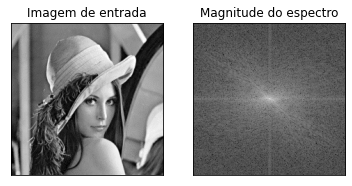

In [16]:
# lendo a Lenna, em cores
img = cv2.imread('../img/lena_color.png', 0)

# aqui, fazemos a trasnformada de fourrier, pela função "dft", que quer dizer "trasnformada de fourier discreta"
# como argumento, passamos a imagem com tipo de dados "float32", usando o numpy para isso
# o argumento "flags=cv2.DFT_COMPLEX_OUTPUT" garante que a transformada de fourier será completa: uma matriz complexa
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
# aqui processamos o espectro da imagem, deslocando a componente de frequência zero do espectro
# para o centro do espectro. Fazemos isso para facilitar a aplicação do filtro.
# usamos a função do numpy "fft.fftshift"
dft_shift = np.fft.fftshift(dft)

# aqui, determinamos a magnitude do espectro (usando a função "magnitude" da OpenCV), 
# e tomamos o logaritmo do espectro (com a função "log" do numpy).
# multiplicamos por 20 para melhor escalar o resultado
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# criamos um subplot com a imagem original
plt.subplot(121), plt.imshow(img, cmap='gray')
# damos o título ao plot ("Imagem de entrada"), e ocultamos as labels dos eixos
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
# criamos um subplot com a magnitude do espectro
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
# damos o título ao plot ("Magnitude do espectro"), e ocultamos as labels dos eixos
plt.title("Magnitude do espectro"), plt.xticks([]), plt.yticks([])
# exibimos a imagem
plt.show()

**Aplicando o filtro e a DFT inversa**

Com a imaem no domínio da frequência (espectro), podemos aplicar o filtro desejado, e depois aplicar a DFT inversa para obtermos a imagem no domínio origin

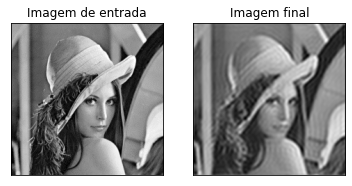

In [5]:
# tomando a dimensão original da imagem
rows, cols = img.shape
# definindo a dimensão do filtro, que será metade das dimensões da imagem
crow, ccol = int(rows / 2), int(cols / 2)

# aqui criamos a máscara do filtro, como um quadrado contendo 1 no centro e zero nas outras entradas
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# aplica á máscara do filtro
fshift = dft_shift * mask

# aqui, fazemos o inverso do deslocamento do espectro que fizemos anteriormente
f_ishift = np.fft.ifftshift(fshift)
# agora, aplicamos a transformada inversa, com a função "idft"
img_back = cv2.idft(f_ishift)
# por fim, calculamos a magnitude do espectro da imagem trasnformada inversamente
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# plotamos a imagem original, como antes
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem de entrada'), plt.xticks([]), plt.yticks([])
# plotamos a imagem final, após a aplciação do filtro e retorno ao domínio original
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Imagem final'), plt.xticks([]), plt.yticks([])
plt.show()

2) Morfologia Matemática
A Morfologia Matemática é um cojunto de ferramentas matemáticas para extração de componentes de imagens baseados na forma de objetos.

Esta técnica é útil para a representação e descrição de:

Cantos;
Bordas;
Esqueletos;
Componente envolvente.
A morfologia é um processo não linear, baseado na teoria de conjuntos e topologia.

A erosão e a dilatação são operadores considerados elementares, pois a maior parte dos operadores morfológicos utilizados podem ser implementados a partir deles.

Assim, os Operadores Elementares são:

Dilatação;
Erosão;
Anti-dilatação;
Anti-erosão.
Exemplos:

Considere a seguinte imagem de entrada:



Erosão - a imagem fica mais fina, através da erosão das bordas:



Dilatação - a imagem fica mais grossa, através do aumento das bordas:



Abertura - é o resultado da aplicação de erosão e depois dilatação. Ruídos externos à forma são eliminados:



Fechamento - é o resultado da aplicação de dilatação e depois erosão. Ruídos internos à forma são eliminados:



Gradiente Morfológico - é a diferença entre dilatação e erosão. Resulta no contorno da forma:



Top Hat- diferença entre a imagem de entrada e a imagem com aplicação de Abertura:



Black Hat - diferença entre a imagem de entrada e a imagem com aplicação de Fechamento:



Vamos agora implementar os exemplos acima em Python com a OpenCV!

Como veremos, os operadores elementares (dilatação e erosão) têm funções próprias ("dilate" e "erode", respectivamente).

Já para as transformações morfológicas compostas, utilizamos a função "morphologyEx", com os argumentos apropriados para cada trasnformação específica.

Importando as bibliotecas

In [1]:
import cv2
import numpy as np

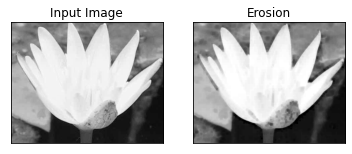

In [7]:
# Erosão

# lendo a imagem de input, o "j" acima
img = cv2.imread('../img/Lotus_free.jpg', 0)
# escolhendo o kernel do filtro que será utilizado. Será uma matrix 5x5 de 1's
kernel = np.ones((5, 5),np.uint8)

# aqui, aplicamos erosão, com a função "erode"
erosion = cv2.erode(img,kernel,iterations = 1)

# exibimos em dois subplots a imagem original e a imagem com a erosão
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion, cmap='gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])
plt.show()

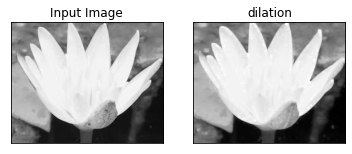

In [8]:
# Dilatação

# aqui, aplicamos dilatação, com a função "dilate"
dilation = cv2.dilate(img,kernel,iterations = 1)

# exibimos em dois subplots a imagem original e a imagem com a dilatação
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation, cmap='gray')
plt.title('dilation'), plt.xticks([]), plt.yticks([])
plt.show()

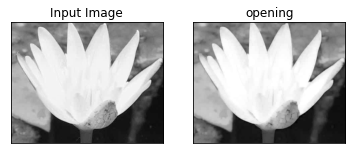

In [10]:
# Abertura

# lendo a imagem original
img = cv2.imread('../img/Lotus_free.jpg', 0)

# aplicação da abertura, com a função "morphologyEx", e argumento "cv2.MORPH_OPEN"
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# exibimos em dois subplots a imagem original e a imagem com a abertura
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening, cmap='gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.show()

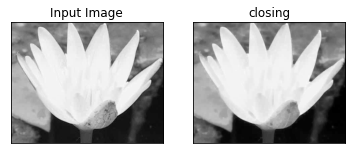

In [11]:
# Fechamento

# lendo a imagem original
img = cv2.imread('../img/Lotus_free.jpg', 0)

# aplicação do fechamento, com a função "morphologyEx", e argumento "cv2.MORPH_CLOSE"
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# exibimos em dois subplots a imagem original e a imagem com fechamento
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

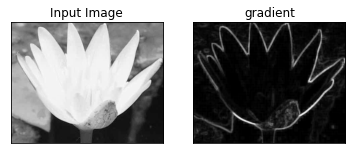

In [12]:
# Gradiente Morfológico

# lendo a imagem original
img = cv2.imread('../img/Lotus_free.jpg', 0)

# aplicação do gradiente morfológico, com a função "morphologyEx", e argumento "cv2.MORPH_GRADIENT"
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# exibimos em dois subplots a imagem original e a imagem com gradiente morfológico
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient, cmap='gray')
plt.title('gradient'), plt.xticks([]), plt.yticks([])
plt.show()

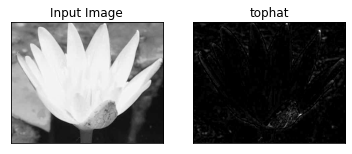

In [13]:
# Top Hat

# definição da matriz de kernel como sendo uma matriz 9x9 de 1's
kernel = np.ones((9, 9),np.uint8)

# aplicação do top hat, com a função "morphologyEx", e argumento "cv2.MORPH_TOPHAT"
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# exibimos em dois subplots a imagem original e a imagem com top hat
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat, cmap='gray')
plt.title('tophat'), plt.xticks([]), plt.yticks([])
plt.show()

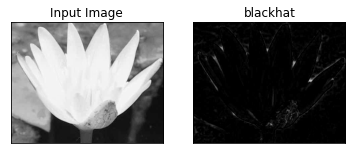

In [14]:
# Black Hat

# aplicação do black hat, com a função "morphologyEx", e argumento "cv2.MORPH_BLACKHAT"
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# exibimos em dois subplots a imagem original e a imagem com black hat
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blackhat, cmap='gray')
plt.title('blackhat'), plt.xticks([]), plt.yticks([])
plt.show()